## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [283]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [284]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [285]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

# display data as above
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [286]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [287]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [288]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [289]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [290]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [291]:
target = 'survived'

In [292]:
vars_cat = [var for var in data.columns if data[var].dtype == 'object']

vars_num = [var for var in data.columns if data[var].dtype != 'object' and var != target]

print(f'Number of numerical variables: {len(vars_num)}; {vars_num}')
print(f'Number of categorical variables: {len(vars_cat)}; {vars_cat}')

Number of numerical variables: 5; ['pclass', 'age', 'sibsp', 'parch', 'fare']
Number of categorical variables: 4; ['sex', 'cabin', 'embarked', 'title']


### Find missing values in variables

In [293]:
# Same procedure as in the lectures
# First find all the variables that contain missing values

vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

vars_with_na

['age', 'fare', 'cabin', 'embarked']

In [294]:
# first in numerical variables
num_na = [var for var in vars_num if var in vars_with_na]

print(f"{len(num_na)}  numerical variables with missing variales: {num_na}")

2  numerical variables with missing variales: ['age', 'fare']


In [295]:
# now in categorical variables
cat_na = [var for var in vars_cat if var in vars_with_na]

print(f"{len(cat_na)}  numerical variables with missing variales: {cat_na}")

2  numerical variables with missing variales: ['cabin', 'embarked']


### Determine cardinality of categorical variables

In variable sex there are 2 unique values.
In variable cabin there are 181 unique values.
In variable embarked there are 3 unique values.
In variable title there are 5 unique values.


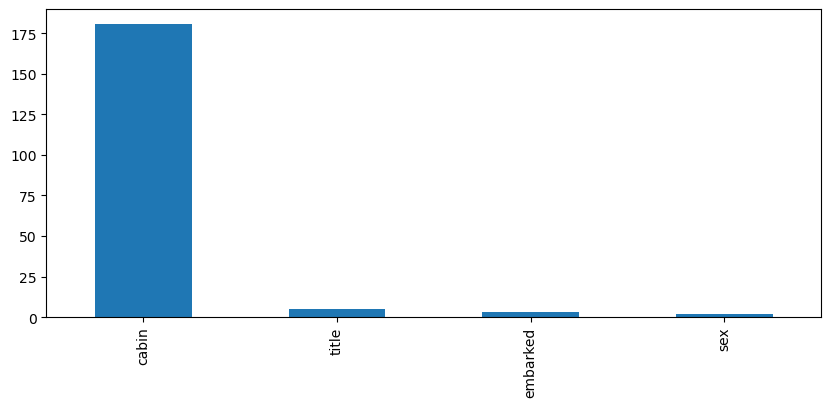

In [296]:
# Hisatogram as in the lecture
data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(10,4)) # Does not display the number itself

# Display how many unique values there actually are

for cat in data[vars_cat]:
    print(f"In variable \033[1m{cat}\033[0m there are \033[1m{data[cat].nunique()}\033[0m unique values.")

### Determine the distribution of numerical variables

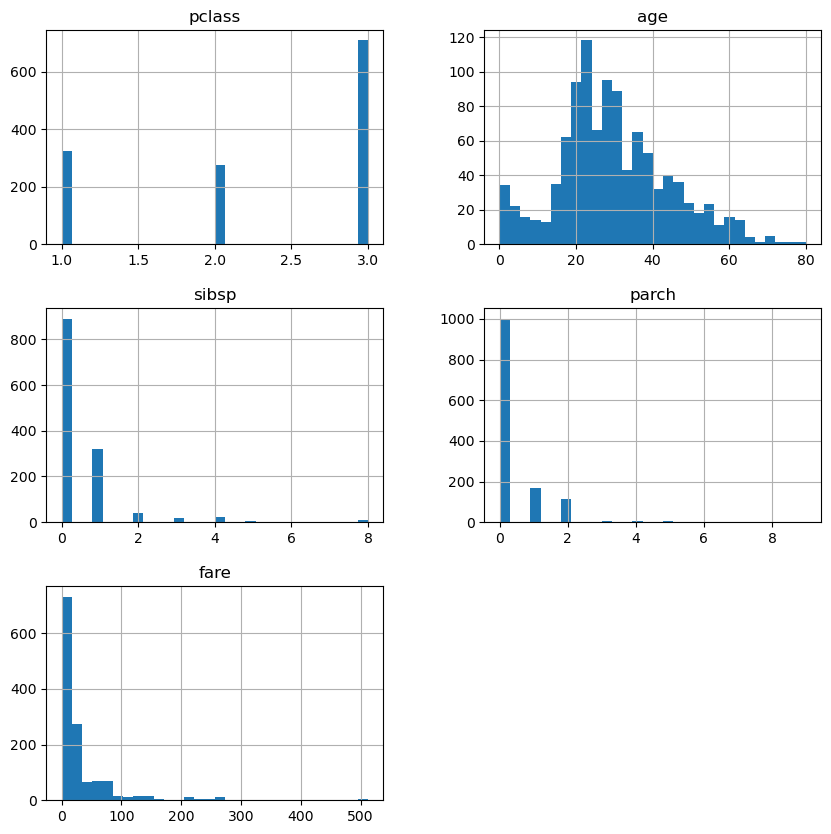

In [297]:
# Since there are discrete and continuous values, we should separate them
data[vars_num].hist(bins=30, figsize=(10,10))
plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [298]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [299]:
def take_letter(value):
    if value is not np.nan:
        return value[0]
    else:
        return value
    
X_train['cabin'] = X_train['cabin'].apply(take_letter)

X_test['cabin'] = X_test['cabin'].apply(take_letter)

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [300]:
# Replace missing values
# We already have num_na from above

for var in num_na:
    
    # Calculate the median of the training set
    median_val = X_train[var].median()
    
    print(var, median_val)
    
    # Binary missing indicator
    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var + '_na'] = np.where(X_test[var].isnull(), 1, 0)
    
    # Replace missing values with the median
    X_train[var].fillna(median_val, inplace=True)
    X_test[var].fillna(median_val, inplace=True)
    
# Check for no missing values
X_train[num_na].isnull().sum()

age 28.0
fare 14.4542


age     0
fare    0
dtype: int64

### Replace Missing data in categorical variables with the string **Missing**

In [301]:
# We already have cat_na

# Replace the missing values with 'Missing'

X_train[cat_na] = X_train[cat_na].fillna('Missing')
X_test[cat_na] = X_test[cat_na].fillna('Missing')

In [302]:
X_train.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
age_na      0
fare_na     0
dtype: int64

In [303]:
X_test.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
age_na      0
fare_na     0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [304]:
# Function to find "frequent" variables

def find_frequent_labels(df, var, rare_perc):
    df = df.copy()
    
    tmp = df.groupby(var)[var].count() / len(df)
    
    #print(tmp)
    
    return tmp[tmp > rare_perc].index

for var in vars_cat:
    # Find frequenc categories
    freq_lbls = find_frequent_labels(X_train, var, 0.05)

    print(var, freq_lbls, '\n')
    
    # Remove rare labels
    X_train[var] = np.where(X_train[var].isin(freq_lbls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(freq_lbls), X_test[var], 'Rare')
    


sex Index(['female', 'male'], dtype='object', name='sex') 

cabin Index(['C', 'Missing'], dtype='object', name='cabin') 

embarked Index(['C', 'Q', 'S'], dtype='object', name='embarked') 

title Index(['Miss', 'Mr', 'Mrs'], dtype='object', name='title') 



In [305]:
X_train[vars_cat].nunique()

sex         2
cabin       3
embarked    4
title       4
dtype: int64

In [306]:
X_test[vars_cat].nunique()

sex         2
cabin       3
embarked    3
title       4
dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [307]:
# Perform the one-hot encoding

for var in vars_cat:
    
    X_train = pd.concat([X_train, pd.get_dummies(X_train[var], prefix=var, drop_first=True)], axis=1)
    
    X_test = pd.concat([X_test, pd.get_dummies(X_test[var], prefix=var, drop_first=True)], axis=1)

# Drop the categorical variables
X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)

In [308]:
X_train.shape, X_test.shape

((1047, 16), (262, 15))

In [309]:
# What is the different column?
for column in X_train.columns:
    if column in X_test.columns:
        pass
    else:
        missing_column = column
        print(column)

embarked_Rare


In [310]:
# Means that embarked_Rare did not have any rare values, so we add this with a 0
X_test[missing_column] = 0

X_test

,pclass,age,sibsp,parch,fare,age_na,fare_na,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare,embarked_Rare
1139,3,38.0,0,0,7.8958,0,0,1,1,0,0,1,1,0,0,0
533,2,21.0,0,1,21.0000,0,0,0,1,0,0,1,0,0,0,0
459,2,42.0,1,0,27.0000,0,0,1,1,0,0,1,1,0,0,0
1150,3,28.0,0,0,14.5000,1,0,1,1,0,0,1,1,0,0,0
393,2,25.0,0,0,31.5000,0,0,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,3,22.0,0,0,8.0500,0,0,1,1,0,0,1,1,0,0,0
1052,3,28.0,0,0,7.8958,1,0,1,1,0,0,1,1,0,0,0
426,2,30.0,0,0,13.0000,0,0,1,1,0,0,1,1,0,0,0
554,2,26.0,0,0,13.0000,0,0,1,1,0,0,1,1,0,0,0


### Scale the variables

- Use the standard scaler from Scikit-learn

In [311]:
# The order of the variables is differnt now, so create a list to maintain order
vars = [var for var in X_train.columns]

# Scikit learn scaler
scaler = StandardScaler()

scaler.fit(X_train[vars])

X_train = scaler.transform(X_train[vars])

X_test = scaler.transform(X_test[vars]) # This way we keep the same order of the columns (from solution)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [312]:
# Logistic Regression model
lr_model = LogisticRegression(C=0.0005, random_state=0) 

# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [313]:
# Predicitons for training set
survived_train = lr_model.predict(X_train)
prob_surv_train = lr_model.predict_proba(X_train)[:, 1]

print(f"Training roc-auc: {roc_auc_score(y_train, prob_surv_train)}")
print(f"Training accuracy: {accuracy_score(y_train, survived_train)}")

# Predicitons for the test set
survived_test = lr_model.predict(X_test)
prob_surv_test = lr_model.predict_proba(X_test)[:, 1]

print(f"Test roc-auc: {roc_auc_score(y_test, prob_surv_test)}")
print(f"Test accuracy: {accuracy_score(y_test, survived_test)}")


Training roc-auc: 0.8431723338485316
Training accuracy: 0.7125119388729704
Test roc-auc: 0.8354012345679012
Test accuracy: 0.7022900763358778


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**